# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

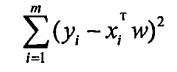

对W求导，当导数为零时，平方误差最小，此时W等于：

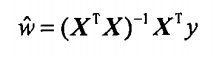

例如有下面一张图片：

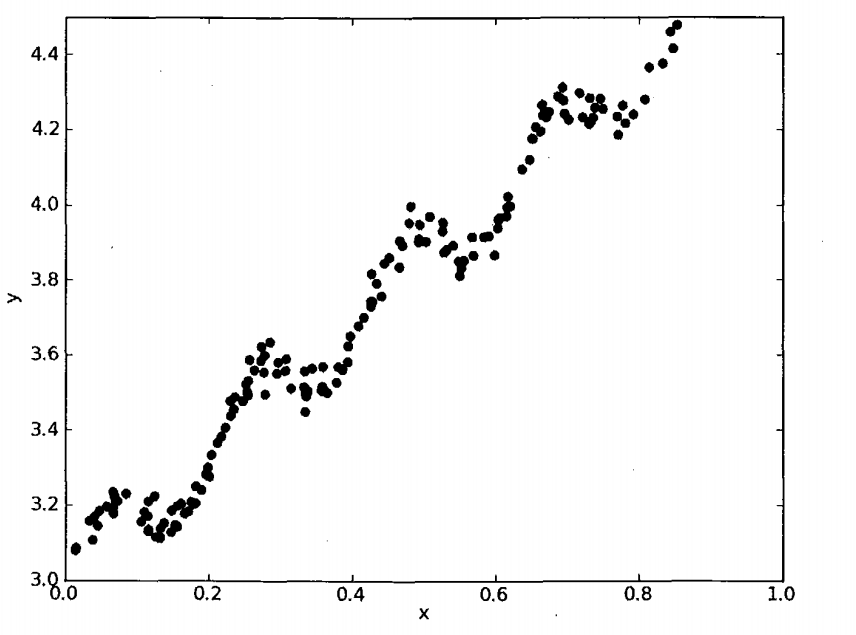

求回归曲线，得到：

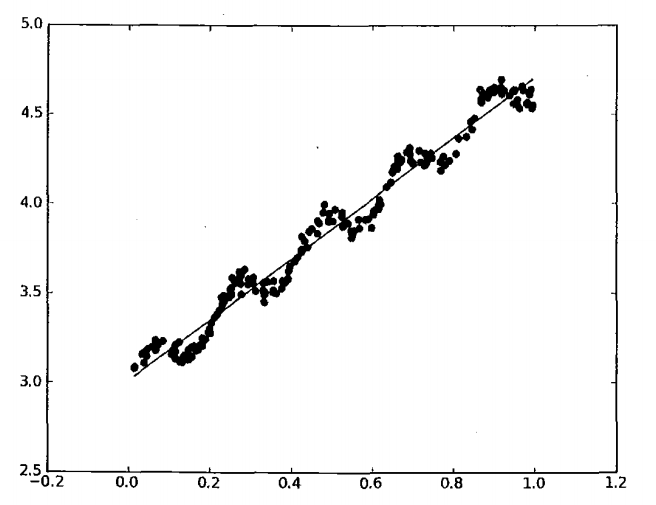

### 2、实例

导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

获取糖尿病数据

In [2]:
from sklearn.datasets import load_diabetes

In [4]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [6]:
diabetes = load_diabetes()
data = diabetes.data
feature_names = diabetes.feature_names
target = diabetes.target

train = DataFrame(data=data,columns=feature_names)

In [7]:
train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [8]:
# 查看s1跟血糖含量的关系

In [10]:
s1_train = train[['s1']]
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [12]:
s1_train.shape

(442, 1)

In [13]:
# 拆分训练集和测试集
X_train = s1_train[:400]
y_train = target[:400]

X_test = s1_train[400:]
y_test = target[400:]

In [14]:
# 选择knn回归和linear回归
knn = KNeighborsRegressor()
line = LinearRegression()

In [15]:
knn.fit(X_train,y_train)
line.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y1_ = knn.predict(X_test)
y2_ = line.predict(X_test)

In [17]:
# 可以用来评价回归模型的评分
# 比较大小
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test,y1_)

-0.3014358903678396

In [20]:
r2_score(y_test,y2_)

-0.0572032306895649

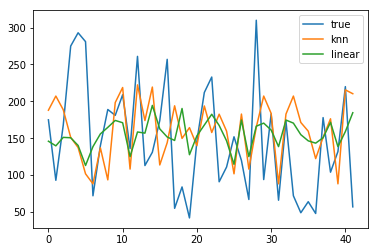

In [25]:
# 通过可视化方式查看预测结果
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_test,label='true')
plt.plot(y1_,label='knn')
plt.plot(y2_,label='linear')
plt.legend()

In [53]:
y_test - y1_

array([ -13. , -114.2,  -20.6,  123.8,  155.6,  179.2,  -16.2,    3. ,
         95.4,  -17.4,   -9.8,   27.8,   38.6,  -61. ,  -88.4,   60.2,
        113. , -139. ,  -65.8, -122.4,    6. ,   18.2,   75.2,  -91.6,
        -48.6,   50.2,  -62.8,  -41.2,  145. , -113.2,   -0.8,  -22.2,
         -9.8, -135.2, -122.4,  -95.6,  -74.4,   26.8,  -72.4,   43.8,
          4.4, -153.4])

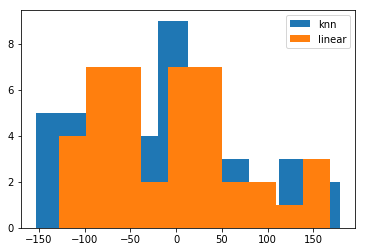

In [56]:
# 使用残差直方图来观察模型预测结果的好坏
# axes1 = plt.subplot(1,2,1)
plt.hist(y_test - y1_,label='knn')

# axes2 = plt.subplot(1,2,2)
plt.hist(y_test - y2_,label='linear')
plt.legend()

# 越瘦越高就越好

In [26]:
# 结论是knn算法的效果更好

In [33]:
s1_train.s1.min(),s1_train.s1.max()

(-0.126780669916514, 0.153913713156516)

Text(0,0.5,'glycemic index')

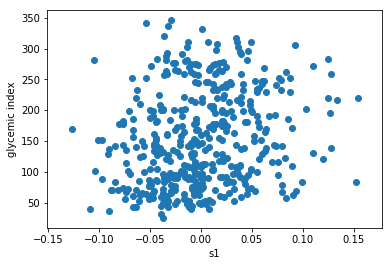

In [35]:
# s1 与血糖含量的对应关系
plt.scatter(s1_train.s1,target)
plt.xlabel('s1')
plt.ylabel('glycemic index')

In [ ]:
s1 ---   x
target   y

In [36]:
x_predict = np.linspace(s1_train.min(),s1_train.max(),100).reshape(-1,1)
y_predict = knn.predict(x_predict)

In [41]:
y_predict1 = line.predict(x_predict)

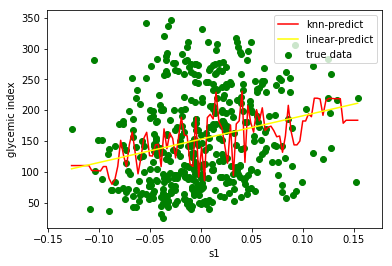

In [42]:
# s1 与血糖含量的对应关系
plt.scatter(s1_train.s1,target,color='green',label='true data')
plt.xlabel('s1')
plt.ylabel('glycemic index')

plt.plot(x_predict,y_predict,color='red',label='knn-predict')
plt.plot(x_predict,y_predict1,color='yellow',label='linear-predict')
plt.legend()

In [ ]:
# 结论：观察到血糖含量随着s1指标增加而上升，所以控制血糖应尽量减少s1的含量

(array([ 4.,  4., 11., 19., 21., 18., 16.,  4.,  1.,  2.]),
 array([-2.16646767, -1.68682899, -1.2071903 , -0.72755162, -0.24791294,
         0.23172575,  0.71136443,  1.19100312,  1.6706418 ,  2.15028049,
         2.62991917]),
 <a list of 10 Patch objects>)

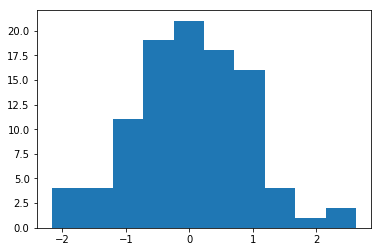

In [43]:
# 扩展
# 也可以使用残差直方图来对线性回归模型进行评价

x = np.random.normal(size=100)
plt.hist(x)

In [44]:
y = np.array([100,30,50,70,100])

y1_ = np.array([101,30,49,72,97])

y2_ = np.array([80,20,70,50,118])

(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1.]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 10 Patch objects>)

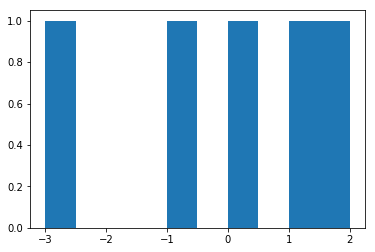

In [46]:
plt.hist(y1_-y)

(array([2., 0., 1., 0., 0., 0., 0., 0., 0., 2.]),
 array([-20., -16., -12.,  -8.,  -4.,   0.,   4.,   8.,  12.,  16.,  20.]),
 <a list of 10 Patch objects>)

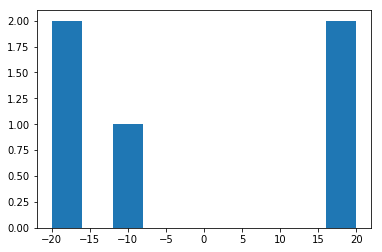

In [47]:
plt.hist(y2_-y)

In [ ]:
# 2个样本 3个特征
2  4  6
1  3  7

1x + 2y = 10
20x + 40y = 200

# 什么场景会出现这种不满秩矩阵的样本集
# 1. 样本数量少于样本特征数量
# 2. 样本之间存在多重共线性

In [ ]:
# 岭回归如何解决这类问题


抽取训练数据和预测数据

创建数学模型

第一步：训练

第二步：预测

第三步：绘制图形

## 二、岭回归

### 1、原理

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

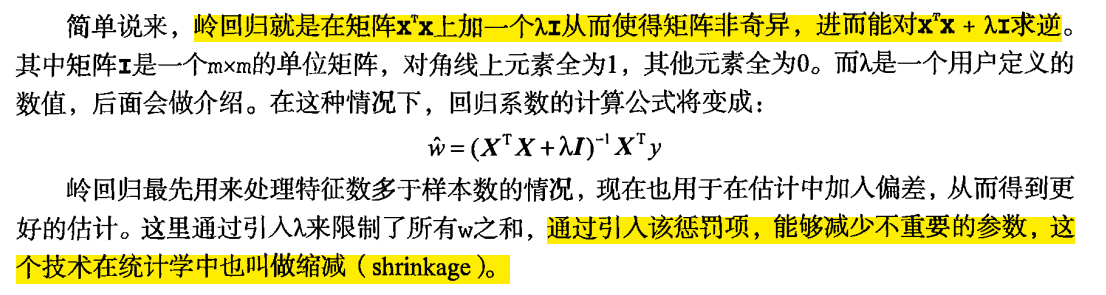

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

In [57]:
data = diabetes.data
target = diabetes.target

In [58]:
linear = LinearRegression()
linear.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# coef_获取模型的系数
linear.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [60]:
linear.coef_.shape

(10,)

In [61]:
data.shape

(442, 10)

In [ ]:
# 线性回归本质就是求解线性方程
# a\b\c看成系数，数字看成样本的特征和样本标签
a*5 + b*3 + c*2 = 9
a*3 + b*2 + c*7 = 10
a*6 + b*8 + c*3 = 11

# 抽象出如下的矩阵，这种矩阵有解
# 这种有解的矩阵叫满秩矩阵
5  3  2
3  2  7
6  8  3

# 不满秩矩阵无解
5  6  3
2  4  8
1  2  4


5  6  3           1  0  0        5+λ  6     3
1  2  4    +  λ* 0  1  0   =    1     2+λ  4
0  0  0           0  0  1        0     0     λ

In [62]:
# 不满秩矩阵不能求逆
a = np.array([[3,3.5,2],[3.2,3.6,3],[6,7,4]])
np.linalg.matrix_rank(a)

2

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
n_samples = 50
n_features = 200

x = np.random.random(size=(n_samples,n_features))
y = np.random.random(n_samples)

In [3]:
from sklearn.linear_model import LinearRegression,Ridge

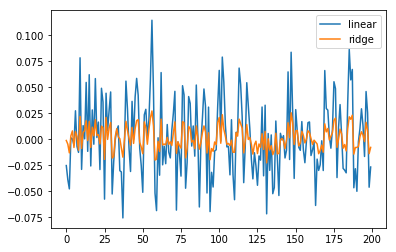

In [4]:
line = LinearRegression()
# 调整岭回归系数，观察结果
ridge = Ridge(alpha=30)

# 分别使用两种回归模型训练，查看两种模型的系数变化
line.fit(x,y)
ridge.fit(x,y)

coef1 = line.coef_
coef2 = ridge.coef_

plt.plot(coef1,label='linear')
plt.plot(coef2,label='ridge')
plt.legend()
# 岭回归有缩减系数的功能

In [5]:
coef1

array([-2.52312492e-02, -3.87814361e-02, -4.76676424e-02,  1.44290208e-03,
        4.03681675e-04, -5.32569272e-03,  2.75015671e-02, -6.74862879e-03,
       -1.25404814e-02,  7.85092917e-02, -2.89331615e-02,  1.32125220e-02,
        4.84376560e-04,  5.48040085e-02, -1.15472475e-02,  6.22213319e-02,
       -2.56364995e-02,  2.83100279e-02, -4.69923233e-03,  5.85030115e-02,
        1.75319677e-03,  1.66236245e-02, -2.90666184e-02,  4.91806026e-02,
        3.59420760e-02, -5.75498877e-02,  4.44092339e-02,  8.25167455e-03,
        2.78141571e-02,  4.56161643e-02, -5.26225780e-02, -2.15651237e-02,
       -4.20071336e-04,  8.83612585e-03,  1.29728733e-02, -3.01366007e-02,
       -3.13588716e-02, -7.56322838e-02, -6.56643509e-03,  5.60412027e-02,
        2.91809813e-02, -8.05550715e-03, -3.09355615e-02,  3.65748996e-02,
       -9.05748985e-05,  4.06877406e-02,  5.86919832e-02,  4.25286835e-02,
       -8.36016951e-03, -2.52034406e-02, -5.09791418e-02,  2.36006544e-02,
        2.89159489e-02,  

使用普通线性回归

使用岭回归

深入研究岭回归

- 理解岭回归缩减系数）

【备注】coef_函数可以获取机器学习模型中各个特征值的系数

拓展：岭回归

创建一个假象数据样本集

In [86]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10).reshape(-1,1))
y = np.array([1,2,3,4,5,6,7,8,9,0])

创建一个alpha集合，用以验证种不同alpha值对预测系数的结果的影响

In [87]:
np.linspace

<function numpy.core.function_base.linspace>

In [89]:
# 创建100个λ系数
alphas = np.logspace(-10,-2,100)

创建岭回归机器学习算法对象

In [93]:
ridge = Ridge()
coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X,y)
    coef = ridge.coef_
    coefs.append(coef)

In [96]:
coefs[0].shape

(10,)

使用不同的alpha进行数据训练，保存所有训练结果的coef_

绘图查看alpha参数和coefs的关系

In [100]:
coefs

[array([  1819.53412019, -27063.46272544,  65274.47945518,  10250.91628795,
        -40890.66165915, -54611.04154283, -38339.06628244,  -5216.5915933 ,
         34680.65188921,  75108.97715174]),
 array([  1774.39049054, -26578.10755632,  64995.46235045,   8132.71263057,
        -40816.0932585 , -52517.91751734, -35882.91579262,  -3942.75666104,
         33762.25326685,  71496.00037073]),
 array([  1718.16910943, -25910.6809641 ,  64123.23473935,   6365.23047017,
        -40378.47033192, -50370.80400172, -33601.02807079,  -2888.80463434,
         32738.12934654,  67997.71692811]),
 array([  1650.97261361, -25066.89953512,  62696.89886707,   4889.43575591,
        -39603.24629097, -48140.72380841, -31441.96122022,  -2018.54788572,
         31601.5774929 ,  64548.82158196]),
 array([  1573.07039556, -24054.12976653,  60755.40508124,   3656.0670938 ,
        -38515.37179035, -45807.44844238, -29365.07950333,  -1301.70357025,
         30349.54799593,  61099.58871944]),
 array([  1484.97783

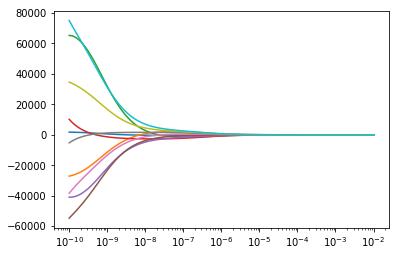

In [103]:
# alpha作为横轴 coefs作为纵轴
plt.plot(alphas,coefs)
plt.xscale('log')

In [ ]:
# 通过岭迹线来观察alpha值的最优区间

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

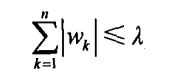

在lambda足够小的时候，一些系数会因此被迫缩减到0

### 2、实例

## 四、普通线性回归、岭回归与lasso回归比较

导包，导入sklearn.metrics.r2_score用于给模型打分

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

数据视图，此处获取各个算法的训练数据的coef_:系数

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt

In [6]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline